<a href="https://colab.research.google.com/github/jyotidabass/Three-class-classification/blob/main/Project_Image_Classification_with_CNN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Image Classification with CNN using Keras__

## __Task 1:__ Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


## __Task 2:__ Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)


    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


## __Task 3:__ Visualize Examples

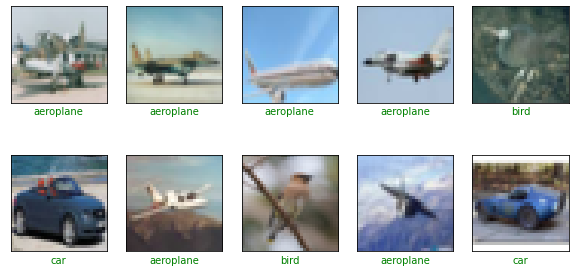

In [4]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    
    
show_random_examples(x_train, y_train, y_train)

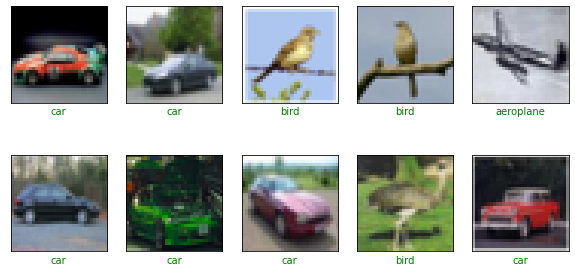

In [ ]:
show_random_examples(x_test, y_test, y_test)

## __Task 4:__ Create Model

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3))) # Check -- its not input()-- Input() is used to instantiate a Keras tensor

    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3 , activation = 'softmax'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer = 'adam', 
        metrics = ['accuracy']
        )

    return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

## __Task 5:__ Train the Model

In [6]:
h = model.fit(
    x_train/225., y_train,
    validation_data = (x_train/225., y_train),
    epochs = 10, batch_size = 128,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3),
                 tf.keras.callbacks.ModelCheckpoint(
                     '/content/models/model_{val_accuracy:.3f}.h5', save_best_only = True,
                      save_weights_only = False, moniter = 'val_accuracy'
                                                    )
                 ]
              )

Epoch 1/10
118/118 [==============================] - 19s 60ms/step - loss: 0.9155 - accuracy: 0.6758 - val_loss: 2.7647 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 6s 50ms/step - loss: 0.5660 - accuracy: 0.7753 - val_loss: 2.4147 - val_accuracy: 0.4303
Epoch 3/10
118/118 [==============================] - 6s 50ms/step - loss: 0.4915 - accuracy: 0.8028 - val_loss: 1.5387 - val_accuracy: 0.5281
Epoch 4/10
118/118 [==============================] - 6s 50ms/step - loss: 0.4548 - accuracy: 0.8191 - val_loss: 1.3882 - val_accuracy: 0.5459
Epoch 5/10
118/118 [==============================] - 6s 50ms/step - loss: 0.4226 - accuracy: 0.8335 - val_loss: 0.4688 - val_accuracy: 0.8095
Epoch 6/10
118/118 [==============================] - 6s 50ms/step - loss: 0.3918 - accuracy: 0.8466 - val_loss: 0.3422 - val_accuracy: 0.8632
Epoch 7/10
118/118 [==============================] - 6s 49ms/step - loss: 0.3622 - accuracy: 0.8595 - val_loss: 0.4935 - val_accuracy: 0.823

__How to Check-Point Deep Learning Models in Keras__

- [tf.keras.callbacks.ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)

- [Checkpointing Neural Network Models](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)

## __Task 6:__ Final Predictions

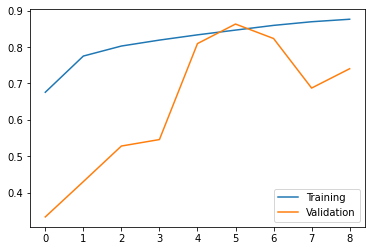

In [7]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label ='Validation')
plt.legend()
plt.show()

In [9]:
model = tf.keras.models.load_model('/content/models/model_0.863.h5')

In [10]:
preds = model.predict(x_test/255.)

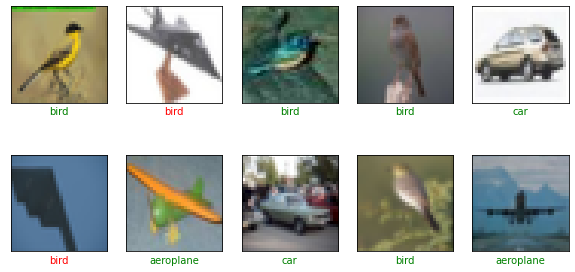

In [11]:
show_random_examples(x_test, y_test, preds)